# Is Fandango Still Inflating Ratings?

В октябре 2015 года Walt Hickey из FiveThirtyEight опубликовал [популярную статью,](https://fivethirtyeight.com/features/fandango-movies-ratings/) в которой он представил убедительные доказательства, того что система рейтинга фильмов Fandango была предвзятой и нечестной. В этом проекте мы проанализируем более свежие данные рейтингов фильмов, чтобы определить, произошло ли какое-либо изменение в рейтинговой системе Fandango после анализа Walt Hickey.

## Understanding the Data

Мы будем работать с двумя наборами рейтингов фильмов: данные в [одном наборе](https://github.com/fivethirtyeight/data/tree/master/fandango) были собраны до анализа Hickey, в то время как [другой набор](https://github.com/mircealex/Movie_ratings_2016_17) был собран после.

In [1]:
import pandas as pd

In [2]:
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Мы выделяем только столбцы, которые предоставляют информацию о Fandango.

In [5]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Наша цель - определить, произошло ли какое-либо изменение в рейтинговой системе Fandango после анализа Hickey.

Из описания Hickey README.md в репозитории набора данных видно, что он использовал следующие критерии выборки:
- Фильм должен был иметь не менее 30 оценок на сайте Фанданго на момент отбора (24 августа 2015 г.).
- Фильм должен быть в продаже в 2015 году.

Выборка была не случайной, потому что не каждый фильм имел одинаковый шанс быть включенным в выборку. У некоторых фильмов вообще не было шансов (например, у тех, у кого до 30 оценок рейтинга или у которых нет в прокате в 2015 году).

Условия выборки для [другого набора](https://github.com/mircealex/Movie_ratings_2016_17) были (как это можно прочитать в README.md хранилища набора данных):
- Фильм должен быть выпущен в 2016 году или позже
- Фильм должен был иметь значительное количество голосов и рецензий (неясно, сколько из README.md).
    

Второй набор также как и первый подвержен временным тенденциям, и он вряд ли будет репрезентативным.

Оба этих автора имели в виду определенные исследовательские вопросы, когда отбирали данные, и они использовали набор критериев, чтобы получить набор данных, который соответствовал бы их вопросам. Их метод выборки называется целевой выборкой (или выборочной / субъективной выборкой). Хотя эти образцы были достаточно хороши для их исследования, они не кажутся нам слишком полезными.

## Changing the Goal of our Analysis

На этом этапе мы можем либо собрать новые данные, либо изменить цель нашего анализа. Мы выбираем последнее и накладываем некоторые ограничения на нашу первоначальную цель.

Вместо того, чтобы пытаться определить, произошло ли какое-либо изменение в рейтинговой системе Fandango после анализа Hickey, наша новая цель - определить, существует ли какая-либо разница между рейтингами Фанданго для популярных фильмов в 2015 году и рейтингами Фанданго для популярных фильмов в 2016 году. Новая цель также должна быть довольно хорошим показателем нашей первоначальной цели.

## Isolating the Samples We Need

У нас есть две группы выборки:
- Все рейтинги Фанданго по популярным фильмам выпущеные в 2015 году.
- Все рейтинги Фанданго для популярных фильмов, выпущенных в 2016 году.

Нужно четко понимать, что считать популярными фильмами. Мы будем использовать критерий Hickey из 30 оценок поклонников и будем считать фильм популярным только в том случае, если на сайте Fandango есть 30 и более оценок.

Хотя одним из критериев выборки в нашем втором примере является популярность фильма, в этом примере не приводится информация о количестве оценок поклонников. Мы должны скептически отнестись еще раз и выяснить, действительно ли этот набор является репрезентативным и содержит популярные фильмы (фильмы с более чем 30 оценками поклонников).

Один из быстрых способов проверить репрезентативность этого набора данных - случайно выбрать из него 10 фильмов, а затем самостоятельно проверить количество оценок поклонников на сайте Fandango. В идеале, 8 из 10 фильмов имеют рейтинг 30 фанатов или более.

In [8]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Мы использовали значение 1 в качестве случайного начального числа. Это хорошая практика, потому что это говорит о том, что мы не пробовали разные случайные числа только для того, чтобы получить подходящий набор.

90% фильмов в нашем наборе популярны. Этого достаточно.

Давайте также дважды проверим другой набор данных для популярных фильмов. В документации четко указано, что есть только фильмы с рейтингом не менее 30 фанатов.

In [9]:
sum(fandango_previous['Fandango_votes'] < 30)

0

Для наших целей нам потребуется выделить только фильмы, выпущенные в 2015 и 2016 годах.

Давайте начнем с набора данных Hickey и выделим только фильмы, выпущенные в 2015 году. Специального столбца для года выпуска нет, но мы должны быть в состоянии извлечь его из строк в столбце FILM.

In [10]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [11]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


Рассмотрим распределение частот для столбца Год, а затем выделим фильмы, выпущенные в 2015 году.

In [12]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [13]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Отлично, теперь выделим фильмы в другом наборе данных.

In [14]:
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [15]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [16]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Наша цель - выяснить, есть ли какая-либо разница между рейтингами Фанданго для популярных фильмов в 2015 году и рейтингами Фанданго для популярных фильмов в 2016 году. Один из способов - проанализировать и сравнить распределения рейтингов фильмов для двух образцов.

Мы начнем со сравнения формы двух распределений, используя kernel density plots.

In [18]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [20]:
plt.style.use('fivethirtyeight')

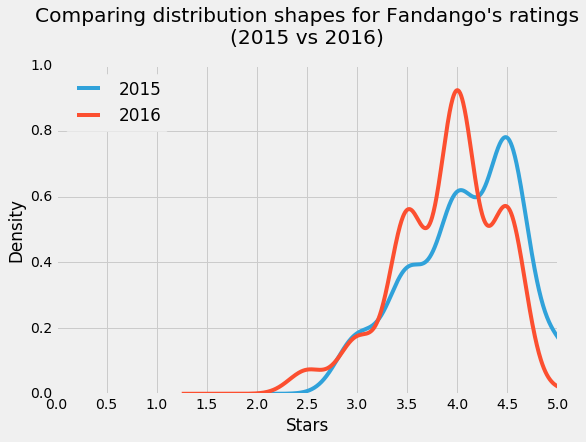

In [26]:
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.05)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

Два вещи бросаются в глаза:
- Оба распределения сильно перекошены.
- Распределение 2016 года слегка смещено влево относительно распределения 2015 года.

Фильмы на Fandango имеют в основном высокие и очень высокие оценки фанатов. Учитывая то, что Fandango продает билеты, высокие оценки немного сомнительны. 

Небольшой сдвиг влево распределения 2016 года очень интересен для нашего анализа. Это показывает, что рейтинги были немного ниже в 2016 году по сравнению с 2015 годом. Это говорит о том, что действительно была разница между рейтингами Фанданго для популярных фильмов в 2015 году и рейтингами Фанданго для популярных фильмов в 2016 году. Мы также видим направление разницы: рейтинги в 2016 году были несколько ниже по сравнению с 2015 годом.

## Comparing Relative Frequencies

Поскольку наборы данных имеют разное количество фильмов, мы нормализуем таблицы.

In [27]:
print('2015')
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [28]:
print('2016')
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

В 2016 году очень высокие рейтинги (4,5 и 5 звезд) имели значительно более низкий процент по сравнению с 2015 годом.

В 2016 году менее 1% фильмов имели идеальный рейтинг в 5 звезд по сравнению с 2015 годом, когда процент был близок к 7%. Рейтинги 4,5 также были более популярными в 2015 году - было примерно на 13% больше фильмов с рейтингом 4,5 в 2015 году по сравнению с 2016 годом.

Минимальный рейтинг также ниже в 2016 году - 2,5 вместо 3 звезд, минимум 2015 года. Очевидно, что есть разница между двумя частотными распределениями.

В 2016 году наблюдался больший процент фильмов, которые получили 3,5 и 4 звезды, по сравнению с 2015 годом. 3,5 и 4,0 - высокие оценки.

## Determining the Direction of the Change

Возьмем несколько метрик, чтобы получить более точную картину о направлении изменений. Далее мы вычислим среднее значение, медиану и моду для обоих распределений, а затем используем гистограмму для построения графиков значений.

In [33]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


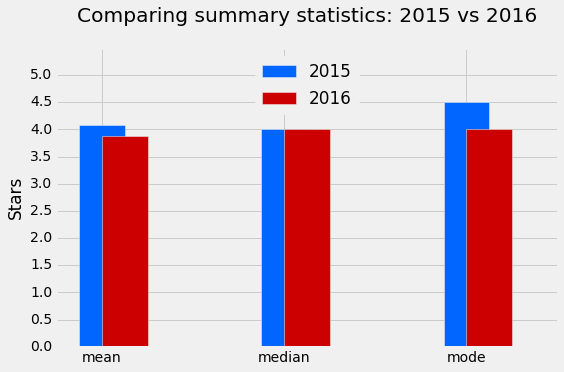

In [46]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

Средний рейтинг в 2016 году был ниже, примерно 0,2. Это означает снижение почти на 5% относительно среднего рейтинга в 2015 году.

In [47]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

В то время как медиана для обоих распределений одинакова, в 2016 году мода ниже на 0,5. Направление изменений, которые мы видели на графике плотности, подтверждается: в среднем популярные фильмы, выпущенные в 2016 году, были оценены несколько ниже, чем популярные фильмы, выпущенные в 2015 году.

# Вывод

Наш анализ показал, что действительно существует небольшая разница между рейтингами Fandango для популярных фильмов в 2015 году и рейтингами Fandango для популярных фильмов в 2016 году. Мы также определили, что в среднем популярные фильмы, выпущенные в 2016 году, были оценены на Фанданго ниже, чем популярные фильмы, выпущенные в 2015 году.

Мы не можем быть полностью уверены в том, что вызвало изменение, но очень вероятно, что это было вызвано тем, что Fandango исправил предвзятую рейтинговую систему после анализа Hickey.